In [55]:
import sys

sys.path.append("..")
import numpy as np
from ipywidgets import interact

from calibration.projector.board import draw_board, gen_checkerboard_grid
from calibration.projector.projector import Projector

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
def f(t1, t2, t3, l1, l2):
    projector = Projector(
        R=np.eye(3), t=np.array([t1, t2, t3]), lambdas=np.array([l1, l2])
    )
    print(
        f"l2: [{-2.61752136752137 * l1 - 6.85141810943093, -2.61752136752137 * l1 - 4.39190876941320}]"
    )
    X = gen_checkerboard_grid(7, 9)
    x = projector.project(X)
    # x1, x2, x = projector.project(X)
    # display(draw_board(x1, "x1"))
    # display(draw_board(x2, "x2"))
    display(draw_board(x, "x"))
    # return draw_board(x, "Board", projector.camera.resolution).update_layout(
    #     width=700, height=700
    # )

In [57]:
interact(
    f,
    t1=(-0.3, 0.3),
    t2=(-0.3, 0.3),
    t3=(-3.0, -1.5),
    l1=(-1.5, 1.5),
    l2=(-10, 0.2),
);

interactive(children=(FloatSlider(value=0.0, description='t1', max=0.3, min=-0.3), FloatSlider(value=0.0, desc…

In [58]:
rez = []


for t1 in np.arange(-0.3, 0.31, 0.3):
    for t2 in np.arange(-0.3, 0.31, 0.3):
        for t3 in np.arange(-3, -1.5, 0.3):
            for l1 in np.arange(-1.5, 1.51, 0.3):
                # for l2 in [0]:

                for l2 in np.arange(
                    -2.61752136752137 * l1 - 6.85141810943093,
                    -2.61752136752137 * l1 - 4.39190876941320,
                    0.1,
                ):
                    t = np.array([t1, t2, t3])
                    lambdas = np.array([l1, l2])

                    key = [*t, *lambdas]
                    proj = Projector(R=np.eye(3), t=t, lambdas=lambdas)
                    X = gen_checkerboard_grid(7, 9)
                    try:
                        x = proj.project(X)

                        if (x > 0).all and (x < proj.camera.resolution).all():
                            rez.append(key + [0])
                        else:
                            rez.append(key + [1])

                    except ValueError as e:
                        assert str(e) == "f(a) and f(b) must have different signs", str(
                            e
                        )
                        # self.fail(f"Value error for {t=}, {lambdas=}")
                        rez.append(key + [2])

In [59]:
import pandas as pd
import plotly.express as px

In [60]:
df = pd.DataFrame(data=rez, columns=["t1", "t2", "t3", "l1", "l2", "rez"])

In [61]:
df.describe()

,t1,t2,t3,l1,l2,rez
count,1.237500e+04,1.237500e+04,12375.000000,1.237500e+04,12375.000000,12375.000000
mean,1.837363e-17,4.593408e-18,-2.400000,1.699561e-16,-5.651418,1.568566
std,2.449589e-01,2.449589e-01,0.424281,9.487216e-01,2.585888,0.495296
min,-3.000000e-01,-3.000000e-01,-3.000000,-1.500000e+00,-10.777700,1.000000
25%,-3.000000e-01,-3.000000e-01,-2.700000,-9.000000e-01,-7.807187,1.000000
50%,0.000000e+00,0.000000e+00,-2.400000,2.220446e-16,-5.651418,2.000000
75%,3.000000e-01,3.000000e-01,-2.100000,9.000000e-01,-3.495649,2.000000
max,3.000000e-01,3.000000e-01,-1.800000,1.500000e+00,-0.525136,2.000000


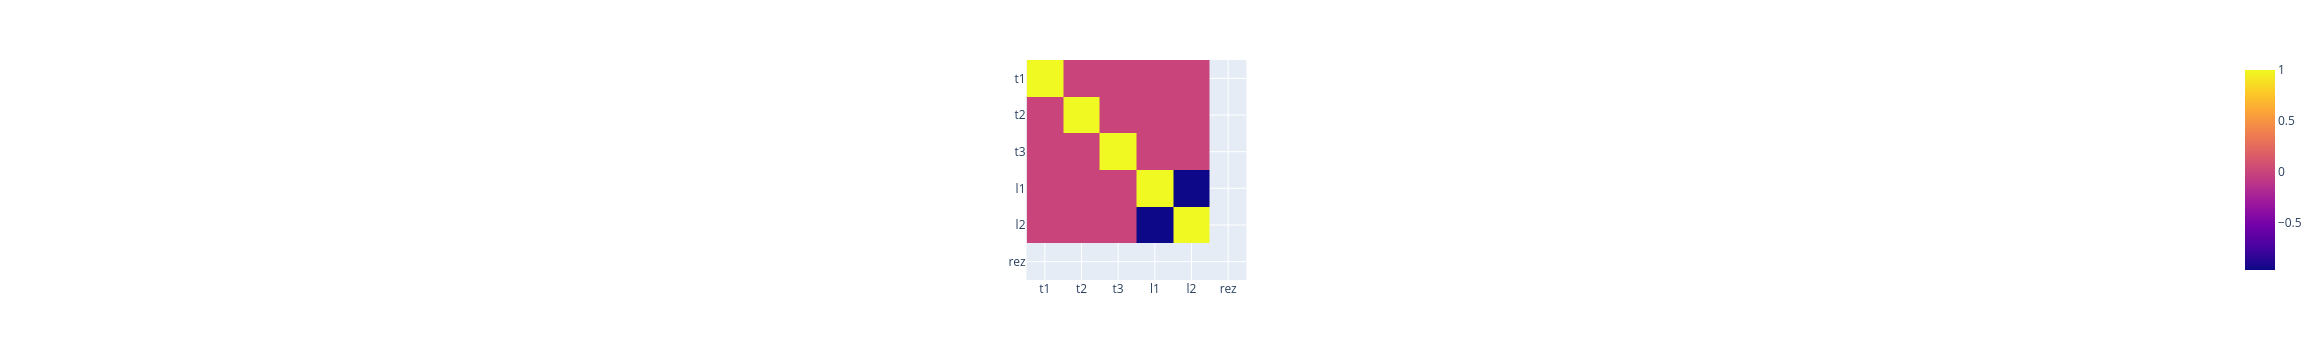

In [54]:
px.imshow(df.corr())

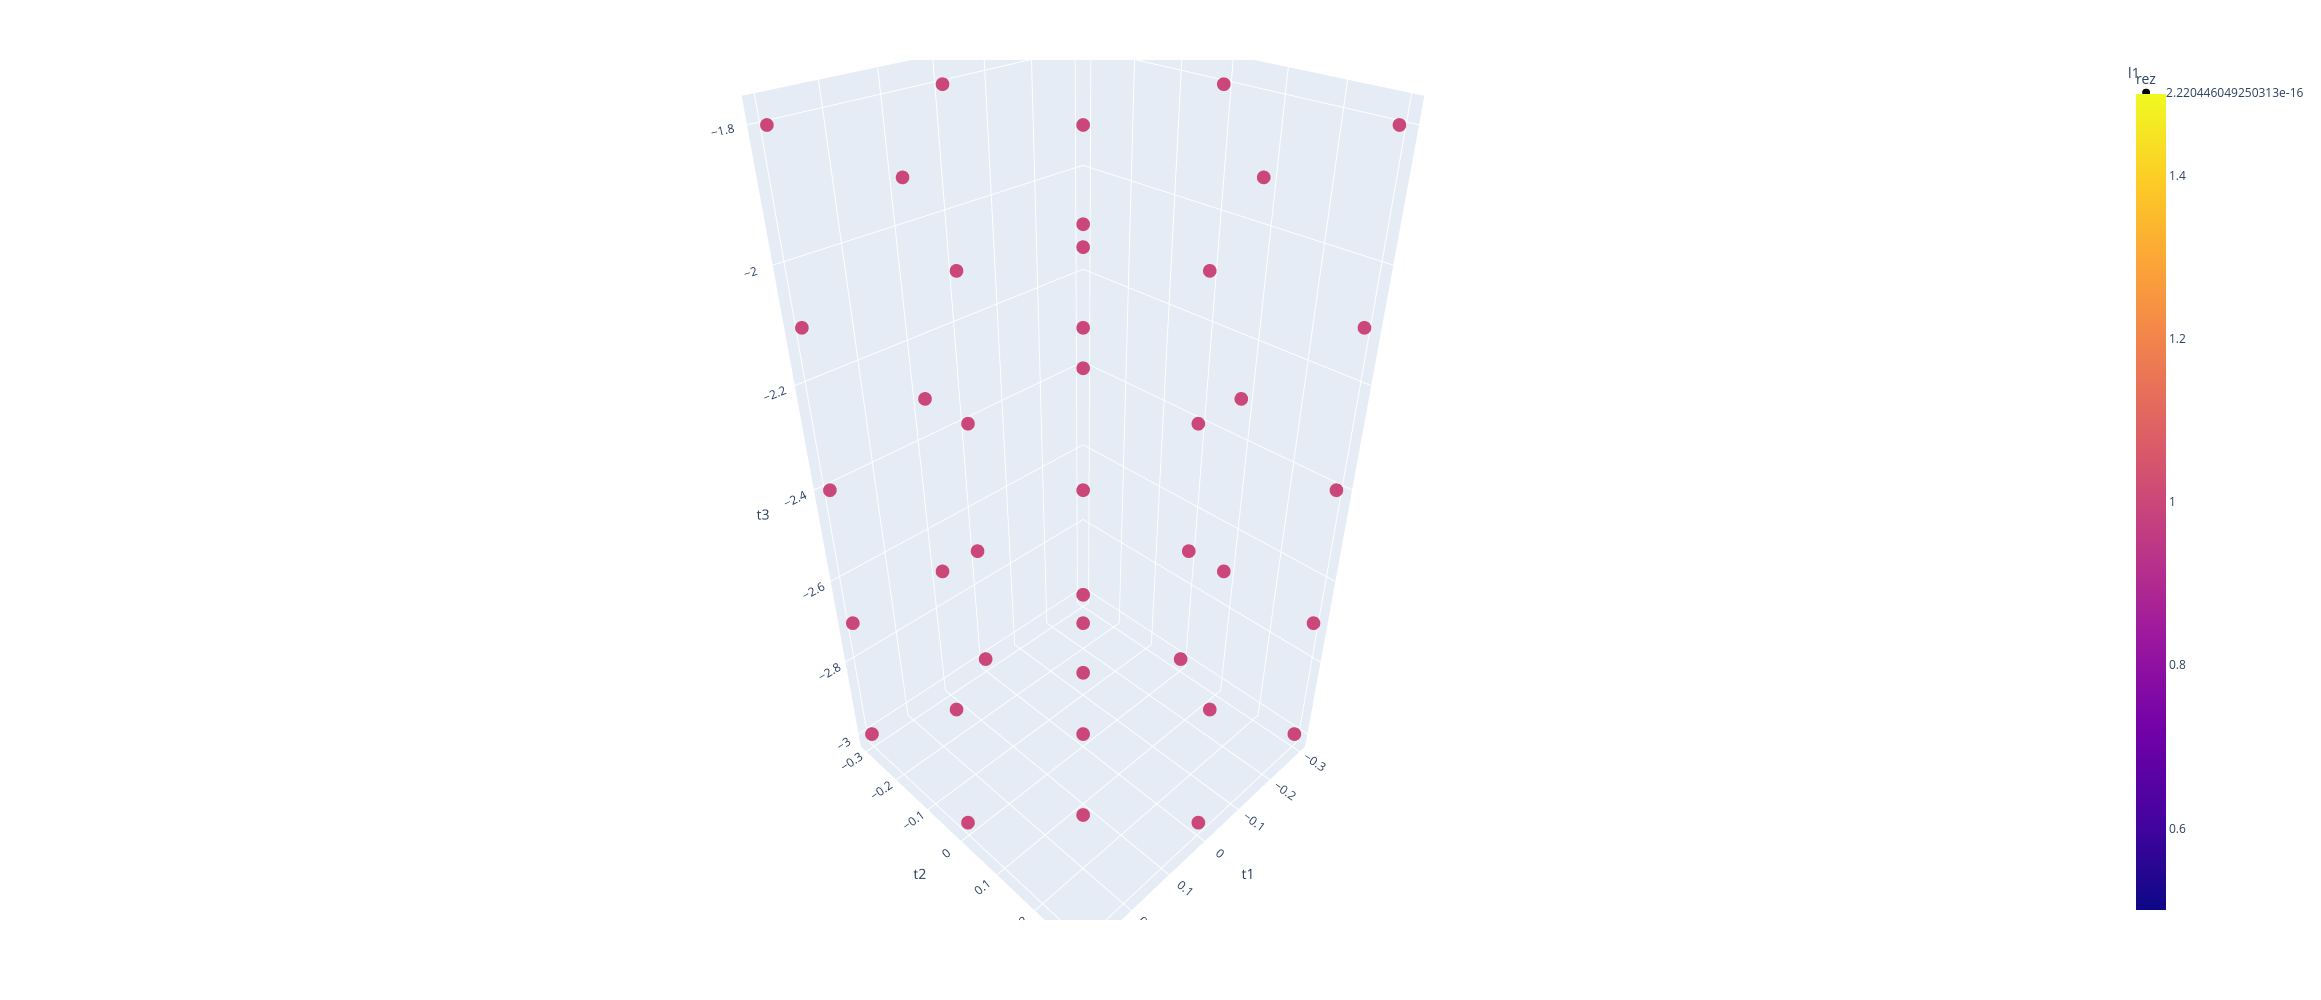

In [48]:
px.scatter_3d(df[df['rez'] == 1], x='l1', y='l2', z='t3', color='rez', symbol='l1', height = 1000)

In [21]:
proj = Projector(R=np.eye(3), t=[0, 0, -1.5], lambdas=[0, 0])

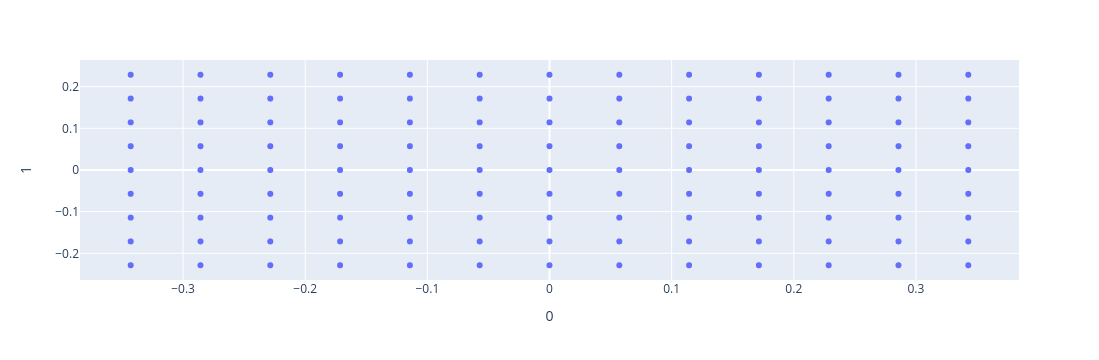

In [25]:
w, h = proj.camera.resolution
xs = [np.array([x, y]) for x in range(0, w + 1, 100) for y in range(0, h + 1, 100)]
xs = np.array(xs)

X = proj.backproject(xs)
px.scatter(X, x=0, y=1)

In [26]:
x = proj.project(X)
px.scatter(x, x=0, y=1)

ValueError: f(a) and f(b) must have different signs